<a href="https://colab.research.google.com/github/kari-hub/Week_6_project/blob/master/Moringa_School_Data_Science_Core_Cohort_3_Independent_project_week_6_Sarah_Wangari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FIFA Data Predictions.

## 1. Defining the Question


### a) Specifying the Question


> You have been recruited as a football analyst by a company known as Mchezopesa Ltd. They have asked you to predict the result of a game between team 1 and team 2, based on who's home and who is away, and whether or not the gme is friendly(rank is to be included in training)

>> We will use the following inputs to create our model:Home team, Away team, Tournament type(World cup, Friendly, Other)


### b) Defining the Metric for Success


### c) Understanding the context


### d) Recording the Experimental Design


### e) Data Relevance


## 2. Reading the Data

In [3]:
# Importing our libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as LinearRegression
import sklearn.preprocessing as PolynomialFeatures
import sklearn.model_selection as train_test_split

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# Loading our datasets

ranks = pd.read_csv('fifa_ranking.csv', sep=',')


In [0]:
result = pd.read_csv('results.csv', sep=',')


## 3. Checking Data

In [7]:
# Previewing the top of our datasets
ranks.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [8]:
result.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [9]:
# Previewing the bottom of our data

ranks.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [10]:
result.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [0]:
# Determining the number of records in our data
ranks.shape

(57793, 16)

In [0]:
result.shape

(40839, 9)

In [0]:
# Determining the data types in our data. This is important as it determines the independent variables to be considered for our model

ranks.dtypes

rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object

In [0]:
result.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

## 4. External Data validation

Making sure our data matches something outside of the dataset is very important. It allows us to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in our dataset.

We made sure to confirm the validity of the data being used to build the prediction model.This helps to maintain the credibility of our work by using reliable data. The validation of our data can be obtained from [here](https://www.fifa.com/fifa-world-ranking/ranking-table/men/).

## 5. Tidying the dataset

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


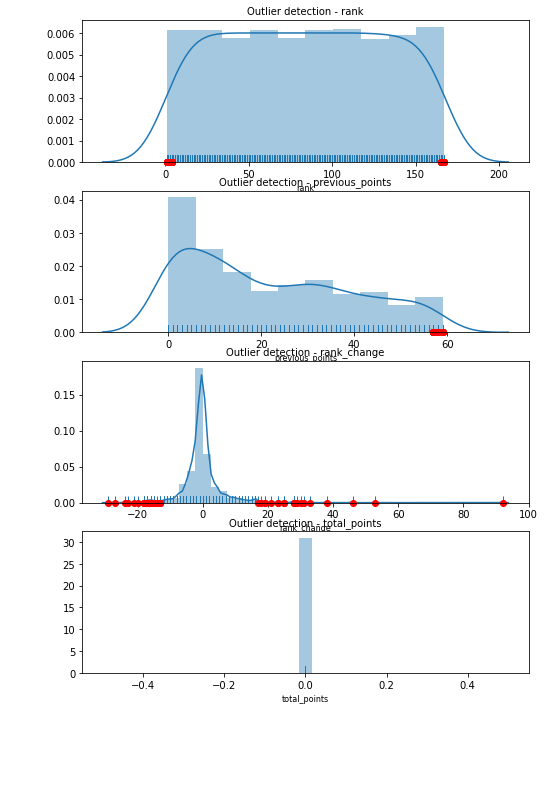

In [0]:
# We will check for anomalies in our data

def percentile_based_outlier(ranks, threshold=95):
  diff = (100 - threshold)/2
  minval, maxval = np.percentile(ranks, [diff, 100 - diff])
  return (ranks < minval) | (ranks > maxval)

col_names = ['rank', 'previous_points', 'rank_change', 'total_points']  

fig, ax = plt.subplots(len(col_names), figsize=(8, 12))

for i, col_val in enumerate(col_names):
  x = ranks[col_val][:1000]
  sns.distplot(x, ax=ax[i], rug=True, hist=True)
  outliers = x[percentile_based_outlier(x)]
  ax[i].plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

  ax[i].set_title("Outlier detection - {}".format(col_val), fontsize=10)
  ax[i].set_xlabel(col_val, fontsize=8)

plt.show()  
  

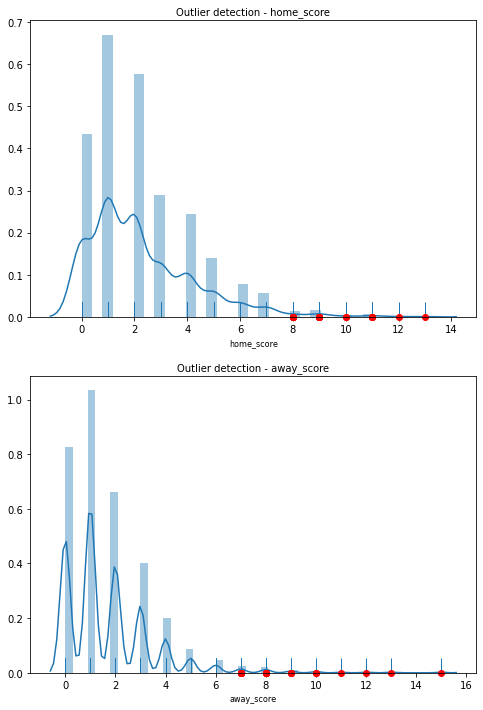

In [0]:
def percentile_based_outlier(result, threshold=95):
  diff = (100 - threshold)/2
  minval, maxval = np.percentile(result, [diff, 100 - diff])
  return (result < minval) | (result > maxval)

col_names = ['home_score', 'away_score']  

fig, ax = plt.subplots(len(col_names), figsize=(8, 12))

for i, col_val in enumerate(col_names):
  x = result[col_val][:1000]
  sns.distplot(x, ax=ax[i], rug=True, hist=True)
  outliers = x[percentile_based_outlier(x)]
  ax[i].plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

  ax[i].set_title("Outlier detection - {}".format(col_val), fontsize=10)
  ax[i].set_xlabel(col_val, fontsize=8)

plt.show() 



In [0]:
# Identifying the missing values

ranks.isnull().any()

rank                       False
country_full               False
country_abrv               False
total_points               False
previous_points            False
rank_change                False
cur_year_avg               False
cur_year_avg_weighted      False
last_year_avg              False
last_year_avg_weighted     False
two_year_ago_avg           False
two_year_ago_weighted      False
three_year_ago_avg         False
three_year_ago_weighted    False
confederation              False
rank_date                  False
dtype: bool

In [0]:
result.isnull().any()

date          False
home_team     False
away_team     False
home_score    False
away_score    False
tournament    False
city          False
country       False
neutral       False
dtype: bool

In [0]:
# Dealing with missing data


In [11]:
# More data cleaning procedures.

# We start cleaning our data by dropping unnecessary columns in our ranks dataset
ranks.drop(['cur_year_avg',	'cur_year_avg_weighted',	'last_year_avg',	'last_year_avg_weighted',	'two_year_ago_avg',	'two_year_ago_weighted',	'three_year_ago_avg',	'three_year_ago_weighted'], inplace=True, axis=1)
ranks

,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
0,1,Germany,GER,0.0,57,0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,CONMEBOL,1993-08-08
...,...,...,...,...,...,...,...,...
57788,206,Anguilla,AIA,0.0,0,1,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,CAF,2018-06-07


In [12]:
# We will replace our column names in our ranks dataset

ranks.columns = ['Rank', 'Country', 'Abbrev', 'TotalPoints', 'PreviousPoints', 'Rankchange', 'Confederation', 'Date']
ranks.columns

Index(['Rank', 'Country', 'Abbrev', 'TotalPoints', 'PreviousPoints',
       'Rankchange', 'Confederation', 'Date'],
      dtype='object')

In [13]:
result.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [14]:
# Replacing our column names in result data.

result.columns = ['Date', 'HomeTeam', 'AwayTeam', 'HomeScore', 'AwayScore', 'Tournament', 'City', 'Venue', 'Neutral']
result.columns


Index(['Date', 'HomeTeam', 'AwayTeam', 'HomeScore', 'AwayScore', 'Tournament',
       'City', 'Venue', 'Neutral'],
      dtype='object')

In [15]:
# We will merge our datasets using the join function

fifa = ranks.merge(result, how='inner', on='Date')
fifa

,Rank,Country,Abbrev,TotalPoints,PreviousPoints,Rankchange,Confederation,Date,HomeTeam,AwayTeam,HomeScore,AwayScore,Tournament,City,Venue,Neutral
0,1,Germany,GER,0.0,57,0,UEFA,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False
1,1,Germany,GER,0.0,57,0,UEFA,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False
2,1,Germany,GER,0.0,57,0,UEFA,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False
3,1,Germany,GER,0.0,57,0,UEFA,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False
4,1,Germany,GER,0.0,57,0,UEFA,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212826,206,Tonga,TGA,0.0,0,1,OFC,2018-06-07,Abkhazia,United Koreans in Japan,2,0,CONIFA World Football Cup,Bromley,England,True
212827,206,Tonga,TGA,0.0,0,1,OFC,2018-06-07,Barawa,Panjab,0,5,CONIFA World Football Cup,Sutton,England,False
212828,206,Tonga,TGA,0.0,0,1,OFC,2018-06-07,Cascadia,Western Armenia,4,0,CONIFA World Football Cup,Bromley,England,True
212829,206,Tonga,TGA,0.0,0,1,OFC,2018-06-07,Northern Cyprus,Padania,3,2,CONIFA World Football Cup,Carshalton,England,True


In [16]:
# Checking again for any missing values after merging our data

fifa.isnull().any()

# We have confirmed that our data has no missing values

Rank              False
Country           False
Abbrev            False
TotalPoints       False
PreviousPoints    False
Rankchange        False
Confederation     False
Date              False
HomeTeam          False
AwayTeam          False
HomeScore         False
AwayScore         False
Tournament        False
City              False
Venue             False
Neutral           False
dtype: bool

In [0]:
# Dropping all duplicates from our data

fifa.drop_duplicates(inplace=True)
fifa

,Rank,Country,Abbrev,TotalPoints,PreviousPoints,Rankchange,Confederation,Date,HomeTeam,AwayTeam,HomeScore,AwayScore,Tournament,City,Venue,Neutral
0,1,Germany,GER,0.0,57,0,UEFA,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False
1,1,Germany,GER,0.0,57,0,UEFA,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False
2,1,Germany,GER,0.0,57,0,UEFA,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False
3,1,Germany,GER,0.0,57,0,UEFA,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False
4,1,Germany,GER,0.0,57,0,UEFA,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212826,206,Tonga,TGA,0.0,0,1,OFC,2018-06-07,Abkhazia,United Koreans in Japan,2,0,CONIFA World Football Cup,Bromley,England,True
212827,206,Tonga,TGA,0.0,0,1,OFC,2018-06-07,Barawa,Panjab,0,5,CONIFA World Football Cup,Sutton,England,False
212828,206,Tonga,TGA,0.0,0,1,OFC,2018-06-07,Cascadia,Western Armenia,4,0,CONIFA World Football Cup,Bromley,England,True
212829,206,Tonga,TGA,0.0,0,1,OFC,2018-06-07,Northern Cyprus,Padania,3,2,CONIFA World Football Cup,Carshalton,England,True


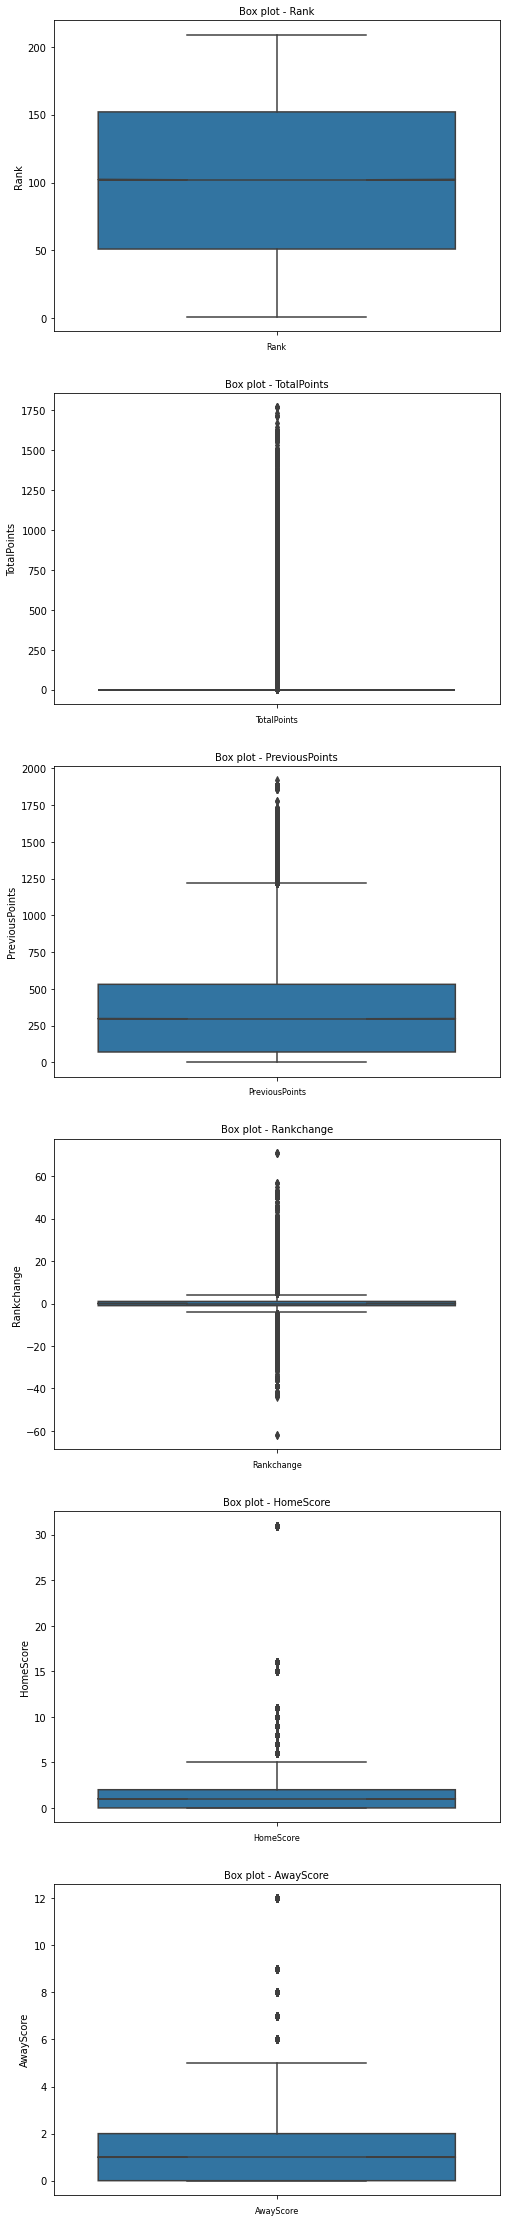

In [17]:
# Checking for outliers 

col_names = ['Rank',	'TotalPoints', 'PreviousPoints', 'Rankchange', 'HomeScore',	'AwayScore']

fig, ax = plt.subplots(len(col_names), figsize=(8,40))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=fifa[col_val], notch=True, ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

In [0]:
# We will then remove outliers in our merged data using the z score

numeric = fifa[['Rank',	'TotalPoints', 'PreviousPoints', 'Rankchange', 'HomeScore',	'AwayScore']]

def detect_outlier(fifa):
  outliers=[]
  threshold=3
  mean_1 = np.mean(fifa)
  std_1 = np.std(fifa)

  for y in fifa:
    z_score = (y - mean_1)/std_1
    if np.abs(z_score) > threshold:
      outliers.append(y)
  return outliers

In [19]:
from scipy import stats

z = np.abs(stats.zscore(numeric))
print(z)

[[1.71993775 0.25987631 0.96321448 0.00203465 0.66897049 0.03739112]
 [1.71993775 0.25987631 0.96321448 0.00203465 0.34624341 0.03739112]
 [1.71993775 0.25987631 0.96321448 0.00203465 1.68418439 0.83239512]
 ...
 [1.77567766 0.25987631 1.15638182 0.22240938 1.17657744 0.83239512]
 [1.77567766 0.25987631 1.15638182 0.22240938 0.66897049 0.75761288]
 [1.77567766 0.25987631 1.15638182 0.22240938 1.17657744 0.75761288]]


In [20]:
data_o = numeric[(z < 3).all(axis=1)]

print(f"Previous dataframe size : {numeric.shape[0]}")
print(f"New dataframe size : {data_o.shape[0]}")

Previous dataframe size : 212831
New dataframe size : 193659


In [0]:
# Combining our data to obtain the cleaned dataset

columns = fifa[['Country', 'Abbrev', 'Confederation',	'Date',	'HomeTeam',	'AwayTeam',	'Tournament',	'City',	'Venue',	'Neutral']]

data_o = pd.concat([columns, data_o], axis=1)



In [0]:
data_o.to_csv('fifa_data.csv')

In [23]:
data = pd.read_csv('fifa_data.csv')
data.head()

,Unnamed: 0,Country,Abbrev,Confederation,Date,HomeTeam,AwayTeam,Tournament,City,Venue,Neutral,Rank,TotalPoints,PreviousPoints,Rankchange,HomeScore,AwayScore
0,0,Germany,GER,UEFA,1993-08-08,Bolivia,Uruguay,FIFA World Cup qualification,La Paz,Bolivia,False,1.0,0.0,57.0,0.0,3.0,1.0
1,1,Germany,GER,UEFA,1993-08-08,Brazil,Mexico,Friendly,Maceió,Brazil,False,1.0,0.0,57.0,0.0,1.0,1.0
2,2,Germany,GER,UEFA,1993-08-08,Ecuador,Venezuela,FIFA World Cup qualification,Quito,Ecuador,False,1.0,0.0,57.0,0.0,5.0,0.0
3,3,Germany,GER,UEFA,1993-08-08,Guinea,Sierra Leone,Friendly,Conakry,Guinea,False,1.0,0.0,57.0,0.0,1.0,0.0
4,4,Germany,GER,UEFA,1993-08-08,Paraguay,Argentina,FIFA World Cup qualification,Asunción,Paraguay,False,1.0,0.0,57.0,0.0,1.0,3.0


In [0]:
# Viewing our columns of records in our dataset

data.columns

Index(['Unnamed: 0', 'Country', 'Abbrev', 'Confederation', 'Date', 'HomeTeam',
       'AwayTeam', 'Tournament', 'City', 'Venue', 'Neutral', 'Rank',
       'TotalPoints', 'PreviousPoints', 'Rankchange', 'HomeScore',
       'AwayScore'],
      dtype='object')

In [0]:
# Checking for null values in our data 

data.isnull().sum()

# There are some null values in our data after we dropped outliers in our numerical data

Unnamed: 0            0
Country               0
Abbrev                0
Confederation         0
Date                  0
HomeTeam              0
AwayTeam              0
Tournament            0
City                  0
Venue                 0
Neutral               0
Rank              19169
TotalPoints       19169
PreviousPoints    19169
Rankchange        19169
HomeScore         19169
AwayScore         19169
dtype: int64

In [0]:
# We will drop all our rows with null values.

data.dropna(axis=0, inplace=True)

In [25]:
# Checking for any remaining null values

data.isnull().sum()

Unnamed: 0        0
Country           0
Abbrev            0
Confederation     0
Date              0
HomeTeam          0
AwayTeam          0
Tournament        0
City              0
Venue             0
Neutral           0
Rank              0
TotalPoints       0
PreviousPoints    0
Rankchange        0
HomeScore         0
AwayScore         0
dtype: int64

In [0]:
# Determining the number of records in our dataset

data.shape

(193629, 17)

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193629 entries, 0 to 212797
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      193629 non-null  int64  
 1   Country         193629 non-null  object 
 2   Abbrev          193629 non-null  object 
 3   Confederation   193629 non-null  object 
 4   Date            193629 non-null  object 
 5   HomeTeam        193629 non-null  object 
 6   AwayTeam        193629 non-null  object 
 7   Tournament      193629 non-null  object 
 8   City            193629 non-null  object 
 9   Venue           193629 non-null  object 
 10  Neutral         193629 non-null  bool   
 11  Rank            193629 non-null  float64
 12  TotalPoints     193629 non-null  float64
 13  PreviousPoints  193629 non-null  float64
 14  Rankchange      193629 non-null  float64
 15  HomeScore       193629 non-null  float64
 16  AwayScore       193629 non-null  float64
dtypes: bool(1)

Now that we have cleaned our data, we can then proceed to creating our prediction models

## 6. Exploratory Data Analysis

## Univariate analysis

In [0]:
# Creating a frequency table for our categorical data
# Country	Abbrev	TotalPoints	PreviousPoints	Rankchange	Date	HomeTeam	AwayTeam	HomeScore	AwayScore	Tournament	City	Venue	Neutral

print('COUNTRY')
print(data.Country.value_counts())
print("\n")

print('DATE')
print(data.Date.value_counts())
print("\n")

print('HOMETEAM')
print(data.HomeTeam.value_counts())
print("\n")

print('TOURNAMENT')
print(data.Tournament.value_counts())
print("\n")

print('AWAYTEAM')
print(data.AwayTeam.value_counts())
print("\n")

print('CITY')
print(data.City.value_counts())
print("\n")

print('VENUE')
print(data.Venue.value_counts())
print("\n")

print('CONFEDERATION')
print(data.Confederation.value_counts())
print("\n")

COUNTRY
Brunei Darussalam    1017
Mauritius            1017
Chinese Taipei       1017
Angola               1017
San Marino           1017
                     ... 
Curaçao               108
South Sudan            81
Gibraltar              22
Kosovo                 22
RCS                    10
Name: Country, Length: 216, dtype: int64


DATE
2010-08-11    10251
2010-03-03     9494
2007-08-22     9045
2005-08-17     9020
2009-02-11     8685
              ...  
2011-12-21      141
2016-02-04      141
2013-02-14      138
2012-11-07      126
2015-11-05      126
Name: Date, Length: 171, dtype: int64


HOMETEAM
Mexico             4812
Estonia            3340
Saudi Arabia       3253
Greece             2739
Portugal           2694
                   ... 
Western Armenia     131
Rwanda              131
Chagos Islands      131
Székely Land        131
Guinea              126
Name: HomeTeam, Length: 191, dtype: int64


TOURNAMENT
Friendly                                      124795
FIFA World Cup qu

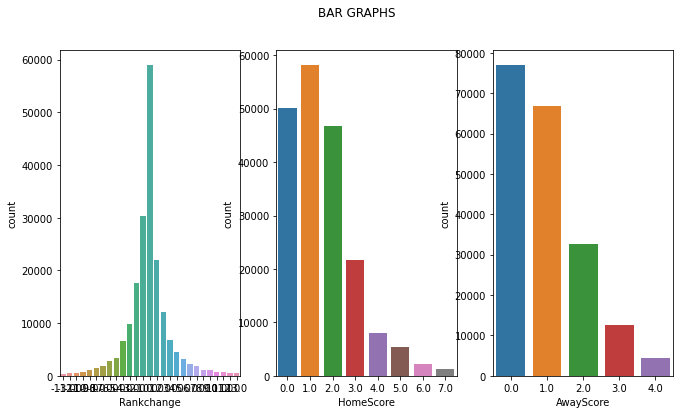

In [0]:
# Creating countplots to visualize our numeric data

fig, (ax4,ax5,ax6) = plt.subplots(1,3,figsize = (11,6))
plt.suptitle('BAR GRAPHS')
plt.xticks(rotation=0)
sns.countplot(data['Rankchange'], ax=ax4)
sns.countplot(data['HomeScore'], ax=ax5)
sns.countplot(data['AwayScore'], ax=ax6)

This tell us that the most scored number of goals scored by teams playing at home is 1.

The most scored number of goals by teams playing away during their matches is 0

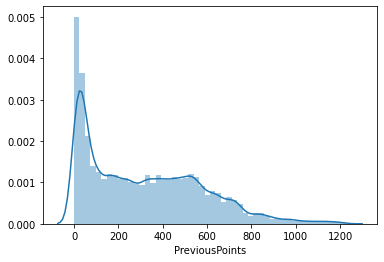

In [0]:
sns.distplot(data.PreviousPoints)

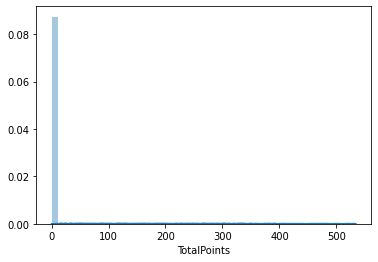

In [0]:
sns.distplot(data.TotalPoints)

## Bivariate Analysis

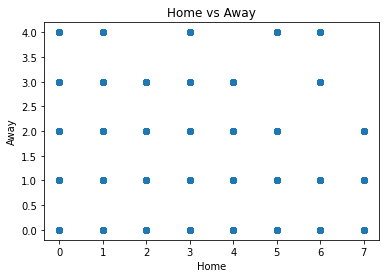

In [26]:
plt.scatter(data['HomeScore'], data['AwayScore'])
plt.title('Home vs Away')
plt.xlabel('Home')
plt.ylabel('Away')
plt.show()

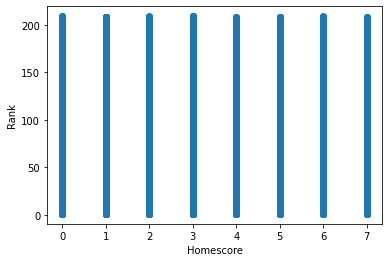

In [27]:
plt.scatter(data['HomeScore'], data['Rank'])
plt.xlabel('Homescore')
plt.ylabel('Rank')
plt.show()


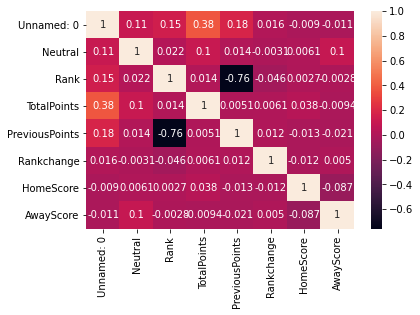

In [28]:
# We will create a correlation matrix for our values

sns.heatmap(data.corr(), annot=True)
plt.show()

We can see that our scores for games played while away and whether our venues were neutral or biased are highly correlated. This shows that home advantage still influences the outcomes of most games played.

The neutrality of our venues and our total points are also highly correlated, showing that the venues do affect a team's total points after a game.

## 7. Implementing the solution

### Detecting Multicollinearity 

We will test for multicollinearity between our independent variables 

In [0]:
# Using label encoder to change the datatype for tournament


from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['Tournament'] = encoder.fit_transform(data['Tournament'])
data['HomeTeam'] = encoder.fit_transform(data['HomeTeam'])
data['AwayTeam'] = encoder.fit_transform(data['AwayTeam'])

In [30]:
# Confirming the data types in our columns

data.dtypes

Unnamed: 0          int64
Country            object
Abbrev             object
Confederation      object
Date               object
HomeTeam            int64
AwayTeam            int64
Tournament          int64
City               object
Venue              object
Neutral              bool
Rank              float64
TotalPoints       float64
PreviousPoints    float64
Rankchange        float64
HomeScore         float64
AwayScore         float64
dtype: object

In [50]:
data.head()

,Unnamed: 0,Country,Abbrev,Confederation,Date,HomeTeam,AwayTeam,Tournament,City,Venue,Neutral,Rank,TotalPoints,PreviousPoints,Rankchange,HomeScore,AwayScore
0,0,Germany,GER,UEFA,1993-08-08,22,184,17,La Paz,Bolivia,False,1.0,0.0,57.0,0.0,3.0,1.0
1,1,Germany,GER,UEFA,1993-08-08,25,104,18,Maceió,Brazil,False,1.0,0.0,57.0,0.0,1.0,1.0
2,2,Germany,GER,UEFA,1993-08-08,49,187,17,Quito,Ecuador,False,1.0,0.0,57.0,0.0,5.0,0.0
3,3,Germany,GER,UEFA,1993-08-08,70,152,18,Conakry,Guinea,False,1.0,0.0,57.0,0.0,1.0,0.0
4,4,Germany,GER,UEFA,1993-08-08,133,7,17,Asunción,Paraguay,False,1.0,0.0,57.0,0.0,1.0,3.0


In [0]:
# We will then drop our dependent variables to remain with our independent ones only

indep_only = data.drop(columns=['AwayScore', 'HomeScore', 'Unnamed: 0', 'Country', 'Abbrev', 'Confederation', 'Date', 'City', 'Venue', 'Neutral', 'TotalPoints', 'PreviousPoints', 'Rankchange'])


In [52]:
# Displaying the correlation between the variables

correlations = indep_only.corr()

correlations

,HomeTeam,AwayTeam,Tournament,Rank
HomeTeam,1.000000,0.051887,-0.040286,0.001953
AwayTeam,0.051887,1.000000,-0.059253,0.003020
Tournament,-0.040286,-0.059253,1.000000,-0.004033
Rank,0.001953,0.003020,-0.004033,1.000000


In [45]:
# Computing VIF score for each variable

pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)


,HomeTeam,AwayTeam,Tournament,Rank
HomeTeam,1.004101,-0.049873,0.037490,-0.001660
AwayTeam,-0.049873,1.006008,0.057589,-0.002708
Tournament,0.037490,0.057589,1.004938,0.003806
Rank,-0.001660,-0.002708,0.003806,1.000027


The VIF scores for each of our variables is not a reason for concern. They are all less than 5 and closer to one, which is a good indication that they are not really dependent on each other.

We will use residual plots and heteroscedacity tests to evaluate our variables using the revised set above

In [53]:
#  Previewing the data to be used in our test

indep_only.head()

,HomeTeam,AwayTeam,Tournament,Rank
0,22,184,17,1.0
1,25,104,18,1.0
2,49,187,17,1.0
3,70,152,18,1.0
4,133,7,17,1.0


In [260]:
# Creating a model using away score as our label

from sklearn.linear_model import LinearRegression

X = indep_only.values
y = data['AwayScore'].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)
# Creating our prediction for the admission based on the model

y_pred = regressor.predict(X_test)

# Creating a residual by subtracting the test value from the predicted value for each row in our data

residual = np.subtract(y_pred, y_test)

# Describing the residual

pd.DataFrame(residual).describe()

residual.mean()


-0.002739946145989899

Since we are trying to estimate the percentage chance of away teams winning the game, values should range between 0 and 1. 

As shown above, our mean is close to 0, meaning that we tend to be fairly correct and slightly overestimating by 0.274%

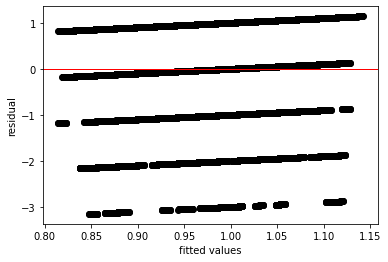

In [263]:
# Showing the residual plot for our data.

plt.scatter(y_pred, residual, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residual.mean(), color='red', linewidth=1)
plt.show()

We can see that the residual is centered around the mean. However, we will use a Barlett's test to conduct a heteroskedacity test for the model.



In [265]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residual)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# Creating a null hypothesis that the variance is equal for all our datapoints

# The new hypothesis claims that the variance is different

# If the test_result is greater than the critical value, then we reject our null hypothesis. 
# This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed!')
else:
  print('the variances are homogeneous.')

inf
the variances are homogeneous.


### Polynomial Regression

For our polynomial regression, we will create two models using our results dataset for our predictions.

Model 1: Predict how many goals the home team scores.

Model 2: Predict how many goals the away team scores.

In [266]:
# We will start by creating a model to predict the number of goals the home team scores.
# Previewing the top of our results data

data.head()

,HomeTeam,AwayTeam,Tournament,Rank,HomeScore,AwayScore
0,22,184,17,1.0,3.0,1.0
1,25,104,18,1.0,1.0,1.0
2,49,187,17,1.0,5.0,0.0
3,70,152,18,1.0,1.0,0.0
4,133,7,17,1.0,1.0,3.0


In [267]:
data.count()

HomeTeam      193629
AwayTeam      193629
Tournament    193629
Rank          193629
HomeScore     193629
AwayScore     193629
dtype: int64

In [291]:
# Determining the ranks of our teams

home = data.groupby(['Rank'])['HomeTeam']
away = data.groupby(['Rank'])['AwayTeam']

print(home.head())
print(away.head())

0          22
1          25
2          49
3          70
4         133
         ... 
198742     30
198743     48
198744     77
198745    159
198746    188
Name: HomeTeam, Length: 1045, dtype: int64
0         184
1         104
2         187
3         152
4           7
         ... 
198742     97
198743    106
198744    111
198745     18
198746    127
Name: AwayTeam, Length: 1045, dtype: int64


In [303]:
# We will split our data to obtain our training and testing sets

X = data.iloc[:, 2:3].values
y = data.iloc[:, 4].values

print(X)
print(y)

[[17]
 [18]
 [17]
 ...
 [10]
 [10]
 [10]]
[3. 1. 5. ... 4. 3. 4.]


**Analysis of our data**

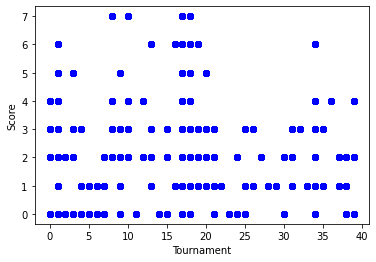

In [310]:
# As we have already cleaned our data, let us visualise our variables.

plt.scatter(X, y, color='blue')
plt.xlabel('Tournament')
plt.ylabel('Home Score')
plt.show()

From the scatter plot, the data does not appear to be linear. So if were to fit a simple linear straight line, it would not cover most of the points. Which is why applying linear regression on this dataset would not give us the correct value.

The other alternative we are left with is applying polynomial regression.

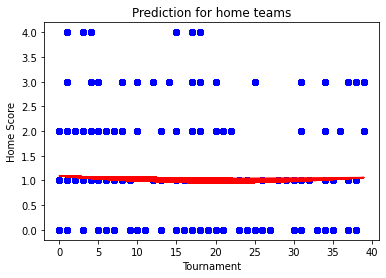

In [317]:
from sklearn.preprocessing import PolynomialFeatures

# Splitting our dataset into train  and test sets

X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 2) 
X_poly = poly_reg.fit_transform(X)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

#Visualize the Polynomial Regression results
plt.scatter(X, y, color='blue')
plt.plot(X, pol_reg.predict(X_poly), color='red')
plt.title('Prediction for home teams')
plt.xlabel('Tournament')
plt.ylabel('Home Score')
plt.show()

In [311]:
# We will use the same model to predict away scores 

X = data.iloc[:, 2:3].values
y = data.iloc[:, 5].values

print(X)
print(y)

[[17]
 [18]
 [17]
 ...
 [10]
 [10]
 [10]]
[1. 1. 0. ... 0. 2. 2.]


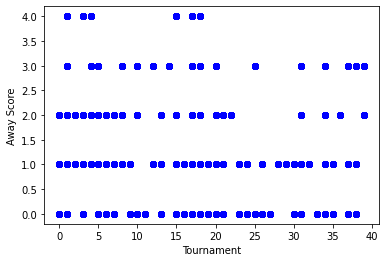

In [313]:
# Visualising our data

plt.scatter(X, y, color='blue')
plt.xlabel('Tournament')
plt.ylabel('Away Score')
plt.show()

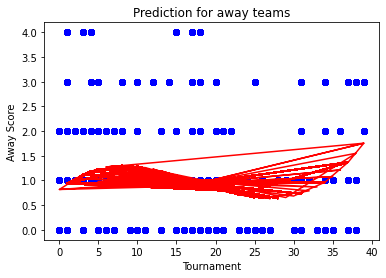

In [320]:
# Splitting our dataset into train  and test sets

X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 3) 
X_poly = poly_reg.fit_transform(X)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

#Visualize the Polynomial Regression results
plt.scatter(X, y, color='blue')
plt.plot(X, pol_reg.predict(X_poly), color='red')
plt.title('Prediction for away teams')
plt.xlabel('Tournament')
plt.ylabel('Away Score')
plt.show()

From our algorithm, we can see that it is difficult to predict the number of scores for both home and away teams by using the above algorithm

### Logistic Regression

Logistic Regression is a machine learnig algorithim used to create models that can classify tasks, like in our case.

We will use this method of regression to create a model that predicts if a game will be a win, draw or a loss based on the home team's perspective.

In [54]:
# Previewing our data

data.head()

,Unnamed: 0,Country,Abbrev,Confederation,Date,HomeTeam,AwayTeam,Tournament,City,Venue,Neutral,Rank,TotalPoints,PreviousPoints,Rankchange,HomeScore,AwayScore
0,0,Germany,GER,UEFA,1993-08-08,22,184,17,La Paz,Bolivia,False,1.0,0.0,57.0,0.0,3.0,1.0
1,1,Germany,GER,UEFA,1993-08-08,25,104,18,Maceió,Brazil,False,1.0,0.0,57.0,0.0,1.0,1.0
2,2,Germany,GER,UEFA,1993-08-08,49,187,17,Quito,Ecuador,False,1.0,0.0,57.0,0.0,5.0,0.0
3,3,Germany,GER,UEFA,1993-08-08,70,152,18,Conakry,Guinea,False,1.0,0.0,57.0,0.0,1.0,0.0
4,4,Germany,GER,UEFA,1993-08-08,133,7,17,Asunción,Paraguay,False,1.0,0.0,57.0,0.0,1.0,3.0


In [0]:
# We will convert our categorical variables to dummy indicators
# ------

# The next thing we need to do is reformat our variables so that they work with the model. 
# Specifically, we need to reformat the neutral variable into numeric variables.

neutral = pd.get_dummies(data['Neutral'], drop_first=True)
neutral.head()

,True
0,0
1,0
2,0
3,0
4,0


In [0]:
data.head()

,Unnamed: 0,Country,Abbrev,Confederation,Date,HomeTeam,AwayTeam,Tournament,City,Venue,Neutral,Rank,TotalPoints,PreviousPoints,Rankchange,HomeScore,AwayScore
0,0,Germany,GER,UEFA,1993-08-08,Bolivia,Uruguay,FIFA World Cup qualification,La Paz,Bolivia,False,1.0,0.0,57.0,0.0,3.0,1.0
1,1,Germany,GER,UEFA,1993-08-08,Brazil,Mexico,Friendly,Maceió,Brazil,False,1.0,0.0,57.0,0.0,1.0,1.0
2,2,Germany,GER,UEFA,1993-08-08,Ecuador,Venezuela,FIFA World Cup qualification,Quito,Ecuador,False,1.0,0.0,57.0,0.0,5.0,0.0
3,3,Germany,GER,UEFA,1993-08-08,Guinea,Sierra Leone,Friendly,Conakry,Guinea,False,1.0,0.0,57.0,0.0,1.0,0.0
4,4,Germany,GER,UEFA,1993-08-08,Paraguay,Argentina,FIFA World Cup qualification,Asunción,Paraguay,False,1.0,0.0,57.0,0.0,1.0,3.0


In [0]:
data.drop(['Abbrev', 'TotalPoints',	'PreviousPoints',	'Rankchange', 'Date',	'City', 'Country', 'Venue', 'Neutral'], axis=1, inplace=True)
data.head()

,Unnamed: 0,Confederation,HomeTeam,AwayTeam,Tournament,Rank,HomeScore,AwayScore
0,0,UEFA,Bolivia,Uruguay,FIFA World Cup qualification,1.0,3.0,1.0
1,1,UEFA,Brazil,Mexico,Friendly,1.0,1.0,1.0
2,2,UEFA,Ecuador,Venezuela,FIFA World Cup qualification,1.0,5.0,0.0
3,3,UEFA,Guinea,Sierra Leone,Friendly,1.0,1.0,0.0
4,4,UEFA,Paraguay,Argentina,FIFA World Cup qualification,1.0,1.0,3.0


In [0]:
data_1 = pd.concat([data,neutral], axis=1)
data_1.head()

,Unnamed: 0,Confederation,HomeTeam,AwayTeam,Tournament,Rank,HomeScore,AwayScore,True
0,0,UEFA,Bolivia,Uruguay,FIFA World Cup qualification,1.0,3.0,1.0,0
1,1,UEFA,Brazil,Mexico,Friendly,1.0,1.0,1.0,0
2,2,UEFA,Ecuador,Venezuela,FIFA World Cup qualification,1.0,5.0,0.0,0
3,3,UEFA,Guinea,Sierra Leone,Friendly,1.0,1.0,0.0,0
4,4,UEFA,Paraguay,Argentina,FIFA World Cup qualification,1.0,1.0,3.0,0


In [0]:
# We will then create another column known as status to represent the outcomes we want to predict
# We will use the numbers 0, 1, 2 to show loss draw and win respectively

data_1.loc[data_1['HomeScore'] < data_1['AwayScore'], 'Status'] = '0'

data_1.loc[data_1['HomeScore'] == data_1['AwayScore'], 'Status'] ='1'

data_1.loc[data_1['HomeScore'] > data_1['AwayScore'], 'Status'] = '2'  

data_1

,Unnamed: 0,Confederation,HomeTeam,AwayTeam,Tournament,Rank,HomeScore,AwayScore,True,Status
0,0,UEFA,Bolivia,Uruguay,FIFA World Cup qualification,1.0,3.0,1.0,0,2
1,1,UEFA,Brazil,Mexico,Friendly,1.0,1.0,1.0,0,1
2,2,UEFA,Ecuador,Venezuela,FIFA World Cup qualification,1.0,5.0,0.0,0,2
3,3,UEFA,Guinea,Sierra Leone,Friendly,1.0,1.0,0.0,0,2
4,4,UEFA,Paraguay,Argentina,FIFA World Cup qualification,1.0,1.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...
212791,212824,OFC,Tamil Eelam,Tuvalu,CONIFA World Football Cup,206.0,4.0,3.0,1,2
212793,212826,OFC,Abkhazia,United Koreans in Japan,CONIFA World Football Cup,206.0,2.0,0.0,1,2
212795,212828,OFC,Cascadia,Western Armenia,CONIFA World Football Cup,206.0,4.0,0.0,1,2
212796,212829,OFC,Northern Cyprus,Padania,CONIFA World Football Cup,206.0,3.0,2.0,1,2


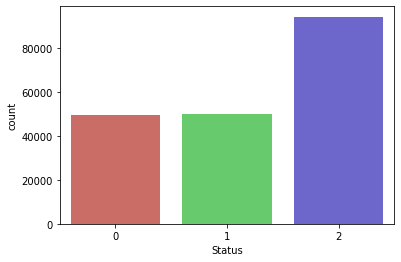

In [0]:
# Checking our variable

sns.countplot(x='Status', data=data_1, palette='hls')

Our data shows us that the number of games won is the highest by teams which play at home. The number of draws are slighly more than losses.

In [0]:
data_1.head()

,Unnamed: 0,Confederation,HomeTeam,AwayTeam,Tournament,Rank,HomeScore,AwayScore,True,Status
0,0,UEFA,Bolivia,Uruguay,FIFA World Cup qualification,1.0,3.0,1.0,0,2
1,1,UEFA,Brazil,Mexico,Friendly,1.0,1.0,1.0,0,1
2,2,UEFA,Ecuador,Venezuela,FIFA World Cup qualification,1.0,5.0,0.0,0,2
3,3,UEFA,Guinea,Sierra Leone,Friendly,1.0,1.0,0.0,0,2
4,4,UEFA,Paraguay,Argentina,FIFA World Cup qualification,1.0,1.0,3.0,0,0


In [0]:
data_1.describe()

,Unnamed: 0,Rank,HomeScore,AwayScore,True
count,193629.000000,193629.000000,193629.000000,193629.000000,193629.000000
mean,102577.495272,105.011047,1.537631,0.971905,0.172066
std,59612.006973,57.904750,1.412315,1.017426,0.377439
min,0.000000,1.000000,0.000000,0.000000,0.000000
25%,51104.000000,56.000000,0.000000,0.000000,0.000000
50%,102028.000000,106.000000,1.000000,1.000000,0.000000
75%,153845.000000,155.000000,2.000000,2.000000,0.000000
max,212830.000000,209.000000,7.000000,4.000000,1.000000


In [0]:
# Dropping the columns that we will not need

data_1.drop(['Confederation', 'HomeTeam', 'Tournament', 'AwayTeam'], inplace=True, axis=1)

In [0]:
# Creating our prediction model
# --------

# Splitting our dataset
from sklearn.model_selection import train_test_split

X = data_1.drop("HomeScore", axis=1)
y = data_1['HomeScore']

print(X)
print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


        Unnamed: 0   Rank  AwayScore  True Status
0                0    1.0        1.0     0      2
1                1    1.0        1.0     0      1
2                2    1.0        0.0     0      2
3                3    1.0        0.0     0      2
4                4    1.0        3.0     0      0
...            ...    ...        ...   ...    ...
212791      212824  206.0        3.0     1      2
212793      212826  206.0        0.0     1      2
212795      212828  206.0        0.0     1      2
212796      212829  206.0        2.0     1      2
212797      212830  206.0        2.0     1      2

[193629 rows x 5 columns]
0         3.0
1         1.0
2         5.0
3         1.0
4         1.0
         ... 
212791    4.0
212793    2.0
212795    4.0
212796    3.0
212797    4.0
Name: HomeScore, Length: 193629, dtype: float64


In [0]:
# Fitting our model

from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# Using our model to make a prediction

y_pred = LogReg.predict(X_test)
y_pred

array([1., 0., 1., ..., 1., 1., 1.])

In [0]:
# Evaluating the model

from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[2215, 7752,    0,    0,    0,    0,    0,    0],
       [2442, 9205,   14,    0,    0,    0,    0,    0],
       [1802, 7412,   15,    0,    0,    0,    0,    0],
       [ 935, 3433,    9,    0,    0,    0,    0,    0],
       [ 369, 1335,    0,    0,    0,    0,    0,    0],
       [ 322,  748,    9,    0,    0,    0,    0,    0],
       [  70,  394,    1,    0,    0,    0,    0,    0],
       [  32,  212,    0,    0,    0,    0,    0,    0]])

In [0]:
# Evaluating the performance of our algorithm.

from sklearn import metrics

# Determining the metrics of our model using MAE, MSE and RMSE

# MAE - Mean absolute error
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

# MSE - Mean squared error
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  

# RMSE - Root mean squared error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  


Mean Absolute Error: 1.1595310644011776
Mean Squared Error: 2.752362753705521
Root Mean Squared Error: 1.6590246392701709


From the output, we will see that the value of root mean squared error is 1.659, which is more than 10% of the mean value of the home score. 

This means that our algorithm did not do decent job at making predictions

## 8. Challenging the solution

### Cross Validation

This entails creating a multivariate model using our data and assessing its accuracy.



In [321]:
data.head()

,HomeTeam,AwayTeam,Tournament,Rank,HomeScore,AwayScore
0,22,184,17,1.0,3.0,1.0
1,25,104,18,1.0,1.0,1.0
2,49,187,17,1.0,5.0,0.0
3,70,152,18,1.0,1.0,0.0
4,133,7,17,1.0,1.0,3.0


In [56]:
from sklearn.linear_model import LinearRegression

from sklearn import metrics

from sklearn.model_selection import KFold

# We will use the independent variables we obtained when creating our residual plots for this
# Using our home score as our label
X = data[['HomeTeam', 'Tournament', 'Rank']].values
y = data['HomeScore'].values

# n = 5 folds
folds = KFold(n_splits=5)

print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# We now create and assess 5 models based on the folds we created.
RMSES = [] 
count = 1  
for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  
  
# With 5 folds, we will end up with 80% of our data in the training set, and 20% in the testing set
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
# fit the model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
# assess the accuracy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + 'Root Mean Squared Error:',rmse_value)
  count = count + 1

we are using 5 folds

Training model 1
Model 1Root Mean Squared Error: 1.4173293552023567

Training model 2
Model 2Root Mean Squared Error: 1.4494474795347634

Training model 3
Model 3Root Mean Squared Error: 1.487557843689151

Training model 4
Model 4Root Mean Squared Error: 1.268149659246159

Training model 5
Model 5Root Mean Squared Error: 1.4374813649762255


In [323]:
# We will use our independent variables for this using the away score
X = data[['AwayTeam', 'Tournament', 'Rank']].values
y = data['AwayScore'].values

folds = KFold(n_splits=5)

print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# Assessing the 5 models we have created based on the folds we created.
RMSES = [] 
count = 1 
for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  

# With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
# fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
# assess the accuracy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + 'Root Mean Squared Error:',rmse_value)
  count = count + 1

we are using 5 folds

Training model 1
Model 1 Root Mean Squared Error: 1.0824843411264597

Training model 2
Model 2 Root Mean Squared Error: 1.0358286194380306

Training model 3
Model 3 Root Mean Squared Error: 1.0432784374420454

Training model 4
Model 4 Root Mean Squared Error: 0.9793452697103777

Training model 5
Model 5 Root Mean Squared Error: 0.9470286684027872


From our validation, we can clearly see that using home score is less accurate than using the away score, which gives a lower RMSE. It is more appropriate to use the away score since it gives more accurate results.

## 9. Follow up questions

### a). Did we have the right data?

### b). Do we need other data to answer our question?

### c). Did we have the right question?